In [ ]:
import os

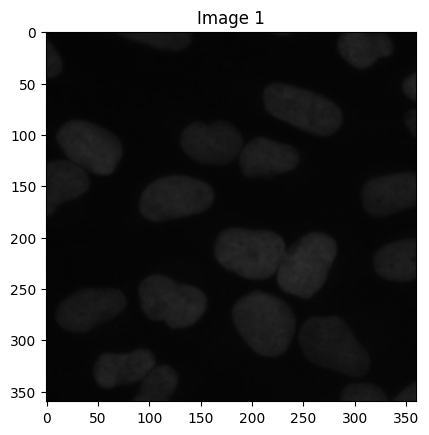

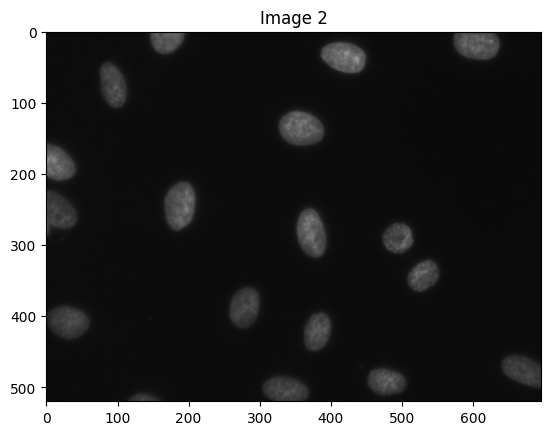

In [2]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('image1.png')
img2 = cv2.imread('image2.png')

plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1")
plt.show()

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2")
plt.show()

In [3]:
import os
os.makedirs("images", exist_ok=True)

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def watershed_comparison(image_path, name):

    img = cv2.imread(image_path)
    original = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding
    ret, thresh = cv2.threshold(gray, 0, 255,
                                cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Remove noise
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,
                               kernel, iterations=2)

    # Sure background
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Distance transform
    dist_transform = cv2.distanceTransform(opening,
                                           cv2.DIST_L2, 5)

    ret, sure_fg = cv2.threshold(dist_transform,
                                 0.5*dist_transform.max(),
                                 255, 0)

    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labeling
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Marker Controlled Watershed
    img_marker = original.copy()
    markers = cv2.watershed(img_marker, markers)
    img_marker[markers == -1] = [255, 0, 0]

    # Simple Watershed
    img_simple = original.copy()
    ret, simple_markers = cv2.connectedComponents(thresh)
    simple_markers = cv2.watershed(img_simple, simple_markers)
    img_simple[simple_markers == -1] = [255, 0, 0]

    # Save outputs
    cv2.imwrite(f"{name}_marker.png", img_marker)
    cv2.imwrite(f"{name}_simple.png", img_simple)

    # Show results
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original")

    plt.subplot(1,3,2)
    plt.imshow(cv2.cvtColor(img_simple, cv2.COLOR_BGR2RGB))
    plt.title("Without Markers")

    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(img_marker, cv2.COLOR_BGR2RGB))
    plt.title("Marker Controlled")

    plt.show()

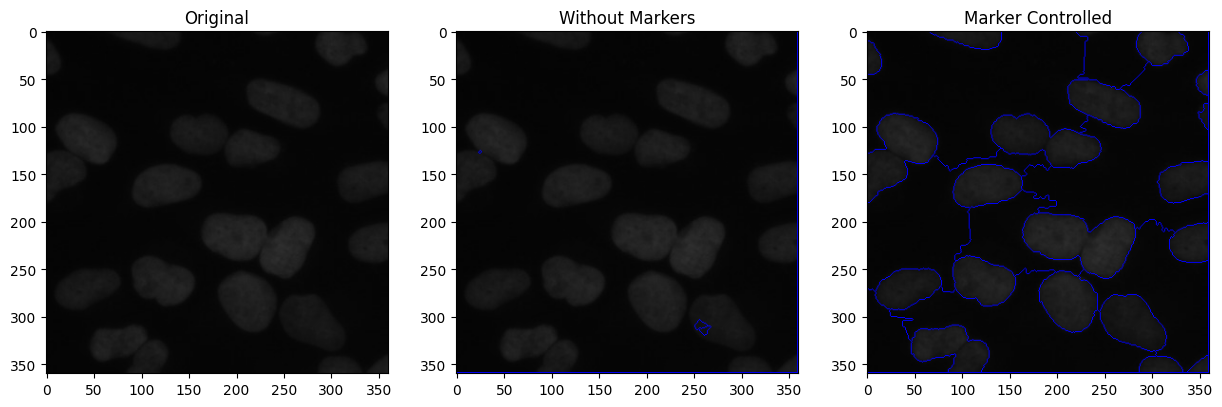

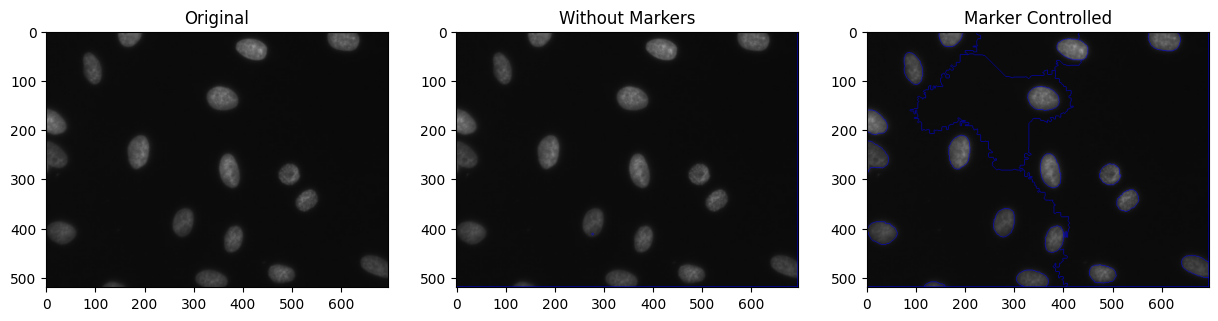

In [5]:
watershed_comparison('image1.png', 'image1')
watershed_comparison('image2.png', 'image2')

Number of nuclei (Without Markers): 25
Number of nuclei (Marker Controlled): 25


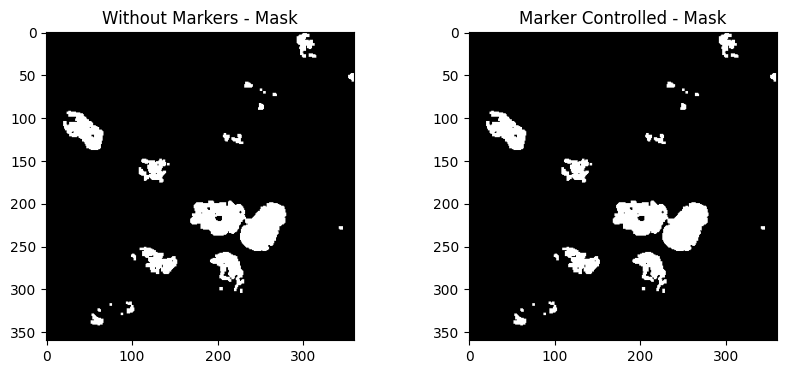

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


simple_path = 'image1_simple.png'
marker_path = 'image1_marker.png'


# Read images
simple = cv2.imread(simple_path)
marker = cv2.imread(marker_path)

# Convert to grayscale
simple_gray = cv2.cvtColor(simple, cv2.COLOR_BGR2GRAY)
marker_gray = cv2.cvtColor(marker, cv2.COLOR_BGR2GRAY)

# Threshold to isolate nuclei (remove dark background)
_, simple_bin = cv2.threshold(simple_gray, 30, 255, cv2.THRESH_BINARY)
_, marker_bin = cv2.threshold(marker_gray, 30, 255, cv2.THRESH_BINARY)

# Remove thin boundary lines using morphology
kernel = np.ones((3,3), np.uint8)
simple_clean = cv2.morphologyEx(simple_bin, cv2.MORPH_OPEN, kernel)
marker_clean = cv2.morphologyEx(marker_bin, cv2.MORPH_OPEN, kernel)

# Count connected components
simple_count, _ = cv2.connectedComponents(simple_clean)
marker_count, _ = cv2.connectedComponents(marker_clean)

simple_nuclei = simple_count - 1
marker_nuclei = marker_count - 1

print("Number of nuclei (Without Markers):", simple_nuclei)
print("Number of nuclei (Marker Controlled):", marker_nuclei)

# Show cleaned masks
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(simple_clean, cmap='gray')
plt.title("Without Markers - Mask")

plt.subplot(1,2,2)
plt.imshow(marker_clean, cmap='gray')
plt.title("Marker Controlled - Mask")

plt.show()

Number of nuclei (Without Markers): 18
Number of nuclei (Marker Controlled): 21


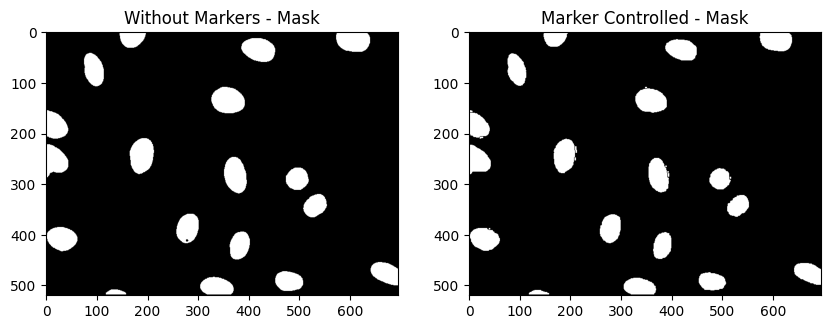

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

simple_path = 'image2_simple.png'
marker_path = 'image2_marker.png'


# Read images
simple = cv2.imread(simple_path)
marker = cv2.imread(marker_path)

# Convert to grayscale
simple_gray = cv2.cvtColor(simple, cv2.COLOR_BGR2GRAY)
marker_gray = cv2.cvtColor(marker, cv2.COLOR_BGR2GRAY)

# Threshold to isolate nuclei (remove dark background)
_, simple_bin = cv2.threshold(simple_gray, 30, 255, cv2.THRESH_BINARY)
_, marker_bin = cv2.threshold(marker_gray, 30, 255, cv2.THRESH_BINARY)

# Remove thin boundary lines using morphology
kernel = np.ones((3,3), np.uint8)
simple_clean = cv2.morphologyEx(simple_bin, cv2.MORPH_OPEN, kernel)
marker_clean = cv2.morphologyEx(marker_bin, cv2.MORPH_OPEN, kernel)

# Count connected components
simple_count, _ = cv2.connectedComponents(simple_clean)
marker_count, _ = cv2.connectedComponents(marker_clean)

simple_nuclei = simple_count - 1
marker_nuclei = marker_count - 1

print("Number of nuclei (Without Markers):", simple_nuclei)
print("Number of nuclei (Marker Controlled):", marker_nuclei)

# Show cleaned masks
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(simple_clean, cmap='gray')
plt.title("Without Markers - Mask")

plt.subplot(1,2,2)
plt.imshow(marker_clean, cmap='gray')
plt.title("Marker Controlled - Mask")

plt.show()